In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
sns.set(style="whitegrid")
import os
os.getcwd()

'D:\\Term 3- AT\\ISSS606 - Social Analytics and Applications\\Project\\Final Project\\Data & Codes'

In [2]:
df = pd.read_csv('201908-citibike-tripdata.csv')

In [3]:
df.head()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender
0,393,2019-08-01 00:00:01.4680,2019-08-01 00:06:35.3780,531.0,Forsyth St & Broome St,40.718939,-73.992663,408.0,Market St & Cherry St,40.710762,-73.994004,35305,Subscriber,1996,2
1,627,2019-08-01 00:00:01.9290,2019-08-01 00:10:29.7840,274.0,Lafayette Ave & Fort Greene Pl,40.686919,-73.976682,3409.0,Bergen St & Smith St,40.686744,-73.990632,38822,Subscriber,1998,2
2,1132,2019-08-01 00:00:04.0480,2019-08-01 00:18:56.1650,2000.0,Front St & Washington St,40.702551,-73.989402,3388.0,President St & Henry St,40.682800,-73.999904,18373,Subscriber,1988,1
3,1780,2019-08-01 00:00:04.1630,2019-08-01 00:29:44.7940,479.0,9 Ave & W 45 St,40.760193,-73.991255,473.0,Rivington St & Chrystie St,40.721101,-73.991925,25002,Subscriber,1988,1
4,1517,2019-08-01 00:00:05.4580,2019-08-01 00:25:23.4550,3312.0,1 Ave & E 94 St,40.781721,-73.945940,3312.0,1 Ave & E 94 St,40.781721,-73.945940,31198,Subscriber,1965,2


### Data cleaned based on the following assumptions

#### The first 45 minutes of each ride is included for Annual Members (subscribers), and the first 30 minutes of each ride is included for Day Pass users (customers). If you want to keep a bike out for longer, it’s an extra dollar 4 for each additional 15 minutes.

##### 1) Total NAN values found in the dataset was only 356 which is insignificant for our large database and so we remove these rows
##### 2) Drop any trips where a trip lasted less than 90 seconds and the start station == end station - Citi Bike riders often come across broken bikes and come back to the station to fetch a new one
##### 3) Any trip which lasts longer than 2 hours (7,200 seconds) probably indicates a stolen bike, an anomaly, or incorrect docking of the bike.
#### 4) Removing users who have birth year registered before 1950 - these data could be false

In [4]:
df.isnull().sum().sum()

356

In [5]:
percent_missing = df.isnull().sum() * 100 / len(df)
total_missing = df.isnull().sum()
missing_value_df = pd.DataFrame({'total_missing': total_missing,
                                 'percent_missing': percent_missing})
missing_value_df

,total_missing,percent_missing
tripduration,0,0.000000
starttime,0,0.000000
stoptime,0,0.000000
start station id,89,0.003797
start station name,89,0.003797
start station latitude,0,0.000000
start station longitude,0,0.000000
end station id,89,0.003797
end station name,89,0.003797
end station latitude,0,0.000000


In [6]:
df.dropna(inplace = True)

In [7]:
df.columns = [c.replace(' ', '_') for c in df.columns]

In [8]:
df.head()

,tripduration,starttime,stoptime,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bikeid,usertype,birth_year,gender
0,393,2019-08-01 00:00:01.4680,2019-08-01 00:06:35.3780,531.0,Forsyth St & Broome St,40.718939,-73.992663,408.0,Market St & Cherry St,40.710762,-73.994004,35305,Subscriber,1996,2
1,627,2019-08-01 00:00:01.9290,2019-08-01 00:10:29.7840,274.0,Lafayette Ave & Fort Greene Pl,40.686919,-73.976682,3409.0,Bergen St & Smith St,40.686744,-73.990632,38822,Subscriber,1998,2
2,1132,2019-08-01 00:00:04.0480,2019-08-01 00:18:56.1650,2000.0,Front St & Washington St,40.702551,-73.989402,3388.0,President St & Henry St,40.682800,-73.999904,18373,Subscriber,1988,1
3,1780,2019-08-01 00:00:04.1630,2019-08-01 00:29:44.7940,479.0,9 Ave & W 45 St,40.760193,-73.991255,473.0,Rivington St & Chrystie St,40.721101,-73.991925,25002,Subscriber,1988,1
4,1517,2019-08-01 00:00:05.4580,2019-08-01 00:25:23.4550,3312.0,1 Ave & E 94 St,40.781721,-73.945940,3312.0,1 Ave & E 94 St,40.781721,-73.945940,31198,Subscriber,1965,2


In [9]:
df = df.drop(df[(df.tripduration < 91) & (df.start_station_name == df.end_station_name)].index)

In [10]:
df = df.drop(df[(df.tripduration > 7200)].index)

In [11]:
df = df.drop(df.index[(df['birth_year'] < df['birth_year'].mean()-(2*df['birth_year'].std()))])

In [12]:
df['Age'] = 2019 - df['birth_year'];
df['Age'] = df['Age'].astype(int);

In [13]:
df

,tripduration,starttime,stoptime,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bikeid,usertype,birth_year,gender,Age
0,393,2019-08-01 00:00:01.4680,2019-08-01 00:06:35.3780,531.0,Forsyth St & Broome St,40.718939,-73.992663,408.0,Market St & Cherry St,40.710762,-73.994004,35305,Subscriber,1996,2,23
1,627,2019-08-01 00:00:01.9290,2019-08-01 00:10:29.7840,274.0,Lafayette Ave & Fort Greene Pl,40.686919,-73.976682,3409.0,Bergen St & Smith St,40.686744,-73.990632,38822,Subscriber,1998,2,21
2,1132,2019-08-01 00:00:04.0480,2019-08-01 00:18:56.1650,2000.0,Front St & Washington St,40.702551,-73.989402,3388.0,President St & Henry St,40.682800,-73.999904,18373,Subscriber,1988,1,31
3,1780,2019-08-01 00:00:04.1630,2019-08-01 00:29:44.7940,479.0,9 Ave & W 45 St,40.760193,-73.991255,473.0,Rivington St & Chrystie St,40.721101,-73.991925,25002,Subscriber,1988,1,31
4,1517,2019-08-01 00:00:05.4580,2019-08-01 00:25:23.4550,3312.0,1 Ave & E 94 St,40.781721,-73.945940,3312.0,1 Ave & E 94 St,40.781721,-73.945940,31198,Subscriber,1965,2,54
5,632,2019-08-01 00:00:11.8060,2019-08-01 00:10:43.9590,173.0,Broadway & W 49 St,40.760683,-73.984527,3707.0,Lexington Ave & E 26 St,40.741459,-73.983293,21628,Subscriber,1998,1,21
6,117,2019-08-01 00:00:18.2010,2019-08-01 00:02:15.8600,3718.0,E 11 St & Avenue B,40.727464,-73.979504,326.0,E 11 St & 1 Ave,40.729538,-73.984267,25914,Subscriber,1995,1,24
7,378,2019-08-01 00:00:22.0840,2019-08-01 00:06:40.9350,493.0,W 45 St & 6 Ave,40.756800,-73.982912,3724.0,7 Ave & Central Park South,40.766741,-73.979069,34414,Subscriber,1999,1,20
8,1102,2019-08-01 00:00:22.0870,2019-08-01 00:18:44.3890,355.0,Bayard St & Baxter St,40.716021,-73.999744,3232.0,Bond St & Fulton St,40.689622,-73.983043,28226,Subscriber,1992,1,27
9,1733,2019-08-01 00:00:22.5580,2019-08-01 00:29:15.9080,513.0,W 56 St & 10 Ave,40.768254,-73.988639,469.0,Broadway & W 53 St,40.763441,-73.982681,33448,Customer,1968,1,51


In [14]:
percent_missing = df.isnull().sum() * 100 / len(df)
percent_missing

tripduration               0.0
starttime                  0.0
stoptime                   0.0
start_station_id           0.0
start_station_name         0.0
start_station_latitude     0.0
start_station_longitude    0.0
end_station_id             0.0
end_station_name           0.0
end_station_latitude       0.0
end_station_longitude      0.0
bikeid                     0.0
usertype                   0.0
birth_year                 0.0
gender                     0.0
Age                        0.0
dtype: float64

In [15]:
top_start_df = df.groupby(['start_station_name']).size().reset_index(name = 'Number of Starts')
top_start_df.sort_values('Number of Starts', ascending = False, inplace = True)
top_start = top_start_df.head()
top_start

,start_station_name,Number of Starts
589,Pershing Square North,15812
329,E 17 St & Broadway,13527
778,West St & Chambers St,13377
20,12 Ave & W 40 St,12729
125,8 Ave & W 31 St,12344


(array([0, 1, 2, 3, 4]), <a list of 5 Text xticklabel objects>)

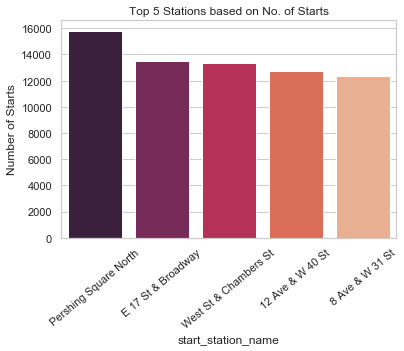

In [16]:
g = sns.barplot(data = top_start
            ,x = 'start_station_name'
            ,y = 'Number of Starts',palette="rocket"
            ).set_title('Top 5 Stations based on No. of Starts')
plt.xticks(rotation=40)

In [17]:
trips_df = df.groupby(['start_station_name','end_station_name']).size().reset_index(name = 'Number of Trips')
trips_df.sort_values('Number of Trips', ascending = False, inplace = True)
trips_df = trips_df.head(10)
trips_df

,start_station_name,end_station_name,Number of Trips
160448,Soissons Landing,Soissons Landing,1156
160447,Soissons Landing,Picnic Point,1055
149801,Picnic Point,Soissons Landing,1045
93817,E 7 St & Avenue A,Cooper Square & Astor Pl,821
51646,Central Park S & 6 Ave,Central Park S & 6 Ave,816
51591,Central Park S & 6 Ave,5 Ave & E 88 St,808
204358,Yankee Ferry Terminal,Yankee Ferry Terminal,794
204355,Yankee Ferry Terminal,Soissons Landing,789
160454,Soissons Landing,Yankee Ferry Terminal,759
5908,12 Ave & W 40 St,West St & Chambers St,665


In [18]:
trips_df['Trip'] = trips_df['start_station_name'] + ' to ' + trips_df['end_station_name']
trips_df

,start_station_name,end_station_name,Number of Trips,Trip
160448,Soissons Landing,Soissons Landing,1156,Soissons Landing to Soissons Landing
160447,Soissons Landing,Picnic Point,1055,Soissons Landing to Picnic Point
149801,Picnic Point,Soissons Landing,1045,Picnic Point to Soissons Landing
93817,E 7 St & Avenue A,Cooper Square & Astor Pl,821,E 7 St & Avenue A to Cooper Square & Astor Pl
51646,Central Park S & 6 Ave,Central Park S & 6 Ave,816,Central Park S & 6 Ave to Central Park S & 6 Ave
51591,Central Park S & 6 Ave,5 Ave & E 88 St,808,Central Park S & 6 Ave to 5 Ave & E 88 St
204358,Yankee Ferry Terminal,Yankee Ferry Terminal,794,Yankee Ferry Terminal to Yankee Ferry Terminal
204355,Yankee Ferry Terminal,Soissons Landing,789,Yankee Ferry Terminal to Soissons Landing
160454,Soissons Landing,Yankee Ferry Terminal,759,Soissons Landing to Yankee Ferry Terminal
5908,12 Ave & W 40 St,West St & Chambers St,665,12 Ave & W 40 St to West St & Chambers St


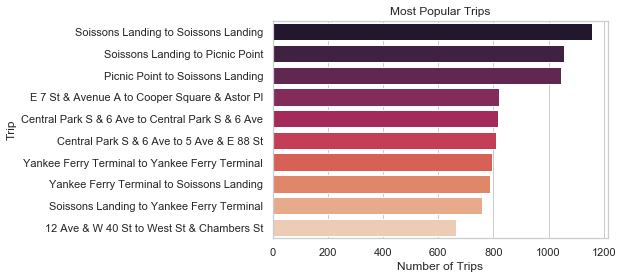

In [19]:
g = sns.barplot(data = trips_df
            ,x = 'Number of Trips'
            ,y = 'Trip',palette="rocket",
            ).set_title('Most Popular Trips')

In [20]:
means_trip = df.groupby('usertype')['tripduration'].mean()
means_trip = pd.DataFrame(means_trip).reset_index()
means_trip.sort_values('usertype', ascending = False, inplace = True)
means_trip

,usertype,tripduration
1,Subscriber,768.690083
0,Customer,1372.036767


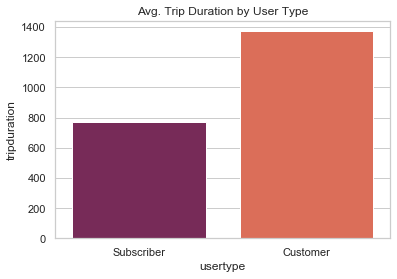

In [21]:
g = sns.barplot(data = means_trip
            ,x = 'usertype'
            ,y = 'tripduration',palette="rocket",
            ).set_title('Avg. Trip Duration by User Type')

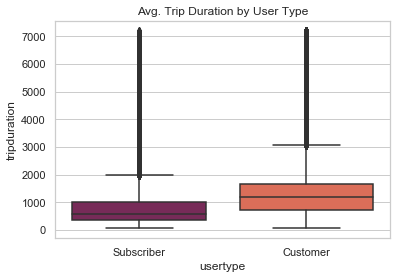

In [22]:
g = sns.boxplot(data = df
            ,x = 'usertype'
            ,y = 'tripduration',palette="rocket",
            ).set_title('Avg. Trip Duration by User Type')

In [23]:
#pip install geopy

In [24]:
#df['start_coordinates'] = df['start_station_latitude'] + ' ' + df['start_station_longitude']
df['start_coordinates'] = list(zip(df['start_station_latitude'], df['start_station_longitude']))
df['end_coordinates'] = list(zip(df['end_station_latitude'], df['end_station_longitude']))

In [25]:
df

,tripduration,starttime,stoptime,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bikeid,usertype,birth_year,gender,Age,start_coordinates,end_coordinates
0,393,2019-08-01 00:00:01.4680,2019-08-01 00:06:35.3780,531.0,Forsyth St & Broome St,40.718939,-73.992663,408.0,Market St & Cherry St,40.710762,-73.994004,35305,Subscriber,1996,2,23,"(40.71893904, -73.99266288)","(40.71076228, -73.99400398)"
1,627,2019-08-01 00:00:01.9290,2019-08-01 00:10:29.7840,274.0,Lafayette Ave & Fort Greene Pl,40.686919,-73.976682,3409.0,Bergen St & Smith St,40.686744,-73.990632,38822,Subscriber,1998,2,21,"(40.68691865, -73.976682)","(40.686744299999994, -73.99063168)"
2,1132,2019-08-01 00:00:04.0480,2019-08-01 00:18:56.1650,2000.0,Front St & Washington St,40.702551,-73.989402,3388.0,President St & Henry St,40.682800,-73.999904,18373,Subscriber,1988,1,31,"(40.70255088, -73.98940236)","(40.6828003, -73.99990419)"
3,1780,2019-08-01 00:00:04.1630,2019-08-01 00:29:44.7940,479.0,9 Ave & W 45 St,40.760193,-73.991255,473.0,Rivington St & Chrystie St,40.721101,-73.991925,25002,Subscriber,1988,1,31,"(40.76019252, -73.9912551)","(40.72110063, -73.99192540000001)"
4,1517,2019-08-01 00:00:05.4580,2019-08-01 00:25:23.4550,3312.0,1 Ave & E 94 St,40.781721,-73.945940,3312.0,1 Ave & E 94 St,40.781721,-73.945940,31198,Subscriber,1965,2,54,"(40.78172120000001, -73.94594000000001)","(40.78172120000001, -73.94594000000001)"
5,632,2019-08-01 00:00:11.8060,2019-08-01 00:10:43.9590,173.0,Broadway & W 49 St,40.760683,-73.984527,3707.0,Lexington Ave & E 26 St,40.741459,-73.983293,21628,Subscriber,1998,1,21,"(40.76068327096592, -73.98452728986742)","(40.741459000000006, -73.983293)"
6,117,2019-08-01 00:00:18.2010,2019-08-01 00:02:15.8600,3718.0,E 11 St & Avenue B,40.727464,-73.979504,326.0,E 11 St & 1 Ave,40.729538,-73.984267,25914,Subscriber,1995,1,24,"(40.727464206923926, -73.97950418293476)","(40.72953837, -73.98426726)"
7,378,2019-08-01 00:00:22.0840,2019-08-01 00:06:40.9350,493.0,W 45 St & 6 Ave,40.756800,-73.982912,3724.0,7 Ave & Central Park South,40.766741,-73.979069,34414,Subscriber,1999,1,20,"(40.7568001, -73.98291153)","(40.7667405590595, -73.9790689945221)"
8,1102,2019-08-01 00:00:22.0870,2019-08-01 00:18:44.3890,355.0,Bayard St & Baxter St,40.716021,-73.999744,3232.0,Bond St & Fulton St,40.689622,-73.983043,28226,Subscriber,1992,1,27,"(40.71602118, -73.99974372)","(40.68962188790333, -73.98304268717766)"
9,1733,2019-08-01 00:00:22.5580,2019-08-01 00:29:15.9080,513.0,W 56 St & 10 Ave,40.768254,-73.988639,469.0,Broadway & W 53 St,40.763441,-73.982681,33448,Customer,1968,1,51,"(40.768254, -73.988639)","(40.76344058, -73.98268129)"


In [26]:
#from geopy.distance import geodesic 
#dist = []
#for i in range(len(df)):
#    dist.append(geodesic(df.iloc[i]['start_coordinates'],df.iloc[i]['end_coordinates']).miles)
#    if (i%1000000==0):
#        print(i)

In [27]:
bike_use_df = df.groupby(['bikeid']).size().reset_index(name = 'Number of Times Used');
bike_use_df = bike_use_df.sort_values('Number of Times Used', ascending = False);

In [28]:
bike_use_df = bike_use_df.head(7)
bike_use_df = bike_use_df.reset_index(drop=True)
bike_use_df

,bikeid,Number of Times Used
0,38124,452
1,38492,441
2,38645,436
3,38252,435
4,39759,428
5,38414,427
6,39053,426


Text(0.5, 1.0, 'Most Popular Bikes by No. of Times Used')

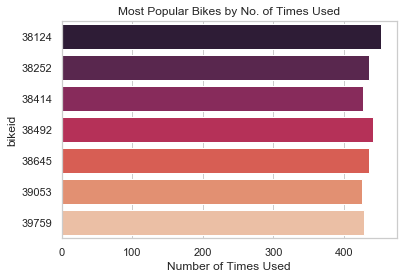

In [29]:
sns.barplot(data = bike_use_df
            ,x = 'Number of Times Used'
            ,y = 'bikeid',palette="rocket", orient = 'h'
            ).set_title('Most Popular Bikes by No. of Times Used')

In [30]:
bike_min_df = df.groupby('bikeid')['tripduration'].sum()
bike_min_df = pd.DataFrame(bike_min_df).reset_index()
#bike_min_df.columns = ['bikeid','tripduration']
bike_min_df = bike_min_df.head(7)
bike_min_df.sort_values('tripduration', ascending = False, inplace = True)
bike_min_df = bike_min_df.reset_index(drop=True)
bike_min_df

,bikeid,tripduration
0,14535,106466
1,14529,87790
2,14533,82551
3,14530,78362
4,14534,74580
5,14531,44089
6,14536,42472


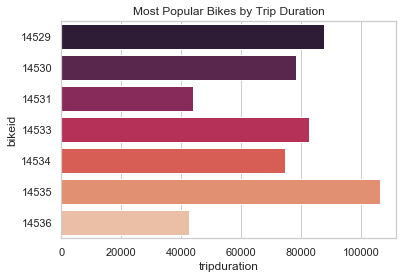

In [118]:
g = sns.barplot(data = bike_min_df
            ,x = 'tripduration'
            ,y = 'bikeid',palette="rocket", orient = 'h',
            ).set_title('Most Popular Bikes by Trip Duration')

In [32]:
import networkx as nx
import matplotlib.pyplot as plt

In [33]:
df.head(5)

,tripduration,starttime,stoptime,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bikeid,usertype,birth_year,gender,Age,start_coordinates,end_coordinates
0,393,2019-08-01 00:00:01.4680,2019-08-01 00:06:35.3780,531.0,Forsyth St & Broome St,40.718939,-73.992663,408.0,Market St & Cherry St,40.710762,-73.994004,35305,Subscriber,1996,2,23,"(40.71893904, -73.99266288)","(40.71076228, -73.99400398)"
1,627,2019-08-01 00:00:01.9290,2019-08-01 00:10:29.7840,274.0,Lafayette Ave & Fort Greene Pl,40.686919,-73.976682,3409.0,Bergen St & Smith St,40.686744,-73.990632,38822,Subscriber,1998,2,21,"(40.68691865, -73.976682)","(40.686744299999994, -73.99063168)"
2,1132,2019-08-01 00:00:04.0480,2019-08-01 00:18:56.1650,2000.0,Front St & Washington St,40.702551,-73.989402,3388.0,President St & Henry St,40.682800,-73.999904,18373,Subscriber,1988,1,31,"(40.70255088, -73.98940236)","(40.6828003, -73.99990419)"
3,1780,2019-08-01 00:00:04.1630,2019-08-01 00:29:44.7940,479.0,9 Ave & W 45 St,40.760193,-73.991255,473.0,Rivington St & Chrystie St,40.721101,-73.991925,25002,Subscriber,1988,1,31,"(40.76019252, -73.9912551)","(40.72110063, -73.99192540000001)"
4,1517,2019-08-01 00:00:05.4580,2019-08-01 00:25:23.4550,3312.0,1 Ave & E 94 St,40.781721,-73.945940,3312.0,1 Ave & E 94 St,40.781721,-73.945940,31198,Subscriber,1965,2,54,"(40.78172120000001, -73.94594000000001)","(40.78172120000001, -73.94594000000001)"


In [124]:
trips_age_df = df.groupby(['Age']).size().reset_index(name = 'No.')
trips_age_df.sort_values('No.', ascending = False, inplace = True)
trips_age_df.head(100)

,Age,No.
34,50,233466
13,29,102629
14,30,102484
12,28,99158
11,27,97232
15,31,93120
10,26,90050
16,32,84499
9,25,82058
17,33,79435


In [34]:
trips_net_df = df.groupby(['start_station_name','end_station_name']).size().reset_index(name = 'Number of Trips')
trips_net_df.sort_values('Number of Trips', ascending = False, inplace = True)
trips_net_df.head(5)

,start_station_name,end_station_name,Number of Trips
160448,Soissons Landing,Soissons Landing,1156
160447,Soissons Landing,Picnic Point,1055
149801,Picnic Point,Soissons Landing,1045
93817,E 7 St & Avenue A,Cooper Square & Astor Pl,821
51646,Central Park S & 6 Ave,Central Park S & 6 Ave,816


In [101]:
trips_net_df['edge_weight'] = list(zip(trips_net_df['start_station_name'], trips_net_df['end_station_name'],trips_net_df['Number of Trips']))
trips_net_df

,start_station_name,end_station_name,Number of Trips,edge_weight
160448,Soissons Landing,Soissons Landing,1156,"(Soissons Landing, Soissons Landing, 1156)"
160447,Soissons Landing,Picnic Point,1055,"(Soissons Landing, Picnic Point, 1055)"
149801,Picnic Point,Soissons Landing,1045,"(Picnic Point, Soissons Landing, 1045)"
93817,E 7 St & Avenue A,Cooper Square & Astor Pl,821,"(E 7 St & Avenue A, Cooper Square & Astor Pl, ..."
51646,Central Park S & 6 Ave,Central Park S & 6 Ave,816,"(Central Park S & 6 Ave, Central Park S & 6 Av..."
51591,Central Park S & 6 Ave,5 Ave & E 88 St,808,"(Central Park S & 6 Ave, 5 Ave & E 88 St, 808)"
204358,Yankee Ferry Terminal,Yankee Ferry Terminal,794,"(Yankee Ferry Terminal, Yankee Ferry Terminal,..."
204355,Yankee Ferry Terminal,Soissons Landing,789,"(Yankee Ferry Terminal, Soissons Landing, 789)"
160454,Soissons Landing,Yankee Ferry Terminal,759,"(Soissons Landing, Yankee Ferry Terminal, 759)"
5908,12 Ave & W 40 St,West St & Chambers St,665,"(12 Ave & W 40 St, West St & Chambers St, 665)"


In [115]:
trips_graph = trips_net_df.head(10000)
#trips_graph = trips_net_df
edge_weight = trips_graph['edge_weight']

In [116]:
# construct an undirected graph based on the above edges
wg = nx.DiGraph()
wg.add_weighted_edges_from(edge_weight)

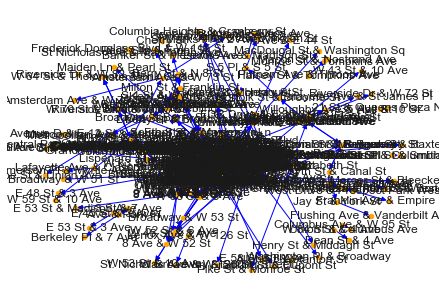

In [66]:
nx.draw(wg, node_size=20, with_labels=True,node_color='orange',edge_color='blue')

<Figure size 864x576 with 0 Axes>

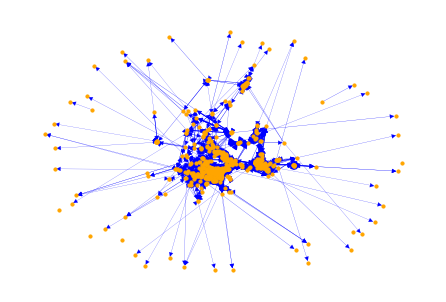

<Figure size 864x576 with 0 Axes>

In [120]:
weights = [wg[u][v]['weight'] for u,v in wg.edges()]
myInt = 300
weights[:] = [x / myInt for x in weights]
nx.draw(wg, node_size=10, with_labels=False,node_color='orange', width = weights, edge_color='blue')
plt.figure(figsize=(12,8))

In [105]:
degree = nx.degree_centrality(wg)

# unweighted
closeness = nx.closeness_centrality(wg)
betweenness = nx.betweenness_centrality(wg)
eigenvector = nx.eigenvector_centrality(wg)

# weighted
closeness_w = nx.closeness_centrality(wg, distance = 'weight')
betweenness_w = nx.betweenness_centrality(wg, weight = 'weight')
eigenvector_w = nx.eigenvector_centrality(wg, weight = 'weight')

# print out various centrality measures
print('Node\t\t\t\t\tDeg\tClo\tBet\tEig\tCloW\tBetW\tEigW')
for n in wg.nodes():
    print('%s\t\t\t\t%.3f\t%.3f\t%.3f\t%.3f\t%.3f\t%.3f\t%.3f' % (n, degree[n], closeness[n], betweenness[n], eigenvector[n],
                                                           closeness_w[n], betweenness_w[n], eigenvector_w[n]))

Node					Deg	Clo	Bet	Eig	CloW	BetW	EigW
Soissons Landing				0.009	0.003	0.000	0.000	0.000	0.000	0.000
Picnic Point				0.009	0.003	0.000	0.000	0.000	0.000	0.000
E 7 St & Avenue A				0.123	0.221	0.001	0.064	0.003	0.001	0.043
Cooper Square & Astor Pl				0.131	0.222	0.001	0.072	0.003	0.001	0.052
Central Park S & 6 Ave				0.114	0.222	0.014	0.030	0.004	0.013	0.030
5 Ave & E 88 St				0.066	0.217	0.010	0.004	0.003	0.011	0.021
Yankee Ferry Terminal				0.009	0.003	0.000	0.000	0.000	0.000	0.000
12 Ave & W 40 St				0.241	0.247	0.053	0.126	0.004	0.028	0.206
West St & Chambers St				0.213	0.247	0.023	0.121	0.004	0.021	0.271
West Drive & Prospect Park West				0.034	0.109	0.032	0.000	0.002	0.034	0.000
McGuinness Blvd & Eagle St				0.028	0.178	0.002	0.000	0.003	0.001	0.000
Vernon Blvd & 50 Ave				0.042	0.188	0.032	0.000	0.003	0.045	0.000
W 20 St & 11 Ave				0.193	0.237	0.004	0.129	0.004	0.007	0.204
Grand Army Plaza & Central Park S				0.117	0.220	0.015	0.018	0.003	0.026	0.021
Vesey Pl & River Terrace		

In [109]:
pagerank = nx.pagerank(wg)

# printout pagerank
for n in wg:
    print('%s\t\t\t%.3f' % (n, pagerank[n]))

Soissons Landing			0.002
Picnic Point			0.001
E 7 St & Avenue A			0.002
Cooper Square & Astor Pl			0.003
Central Park S & 6 Ave			0.004
5 Ave & E 88 St			0.004
Yankee Ferry Terminal			0.001
12 Ave & W 40 St			0.006
West St & Chambers St			0.006
West Drive & Prospect Park West			0.006
McGuinness Blvd & Eagle St			0.002
Vernon Blvd & 50 Ave			0.004
W 20 St & 11 Ave			0.005
Grand Army Plaza & Central Park S			0.004
Vesey Pl & River Terrace			0.004
North Moore St & Greenwich St			0.004
Pier 40 - Hudson River Park			0.004
E 6 St & Avenue B			0.002
5 Ave & E 73 St			0.003
West Thames St			0.002
South End Ave & Liberty St			0.005
N 6 St & Bedford Ave			0.005
S 4 St & Wythe Ave			0.003
Central Park West & W 72 St			0.004
E 13 St & Avenue A			0.003
Broadway & E 14 St			0.005
Centre St & Chambers St			0.005
Pershing Square North			0.007
W 33 St & 7 Ave			0.003
Richardson St & N Henry St			0.001
Graham Ave & Conselyea St			0.003
7 Ave & Central Park South			0.003
Murray St & Greenwich St			0.002
